In [ ]:
import pandas as pd


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('/content/campaignData.csv')

In [ ]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15


In [ ]:
df.shape

(2240, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year_Birth        2240 non-null   int64  
 1   Education         2240 non-null   object 
 2   Marital_Status    2240 non-null   object 
 3   Income            2216 non-null   float64
 4   Kidhome           2240 non-null   int64  
 5   Teenhome          2240 non-null   int64  
 6   Recency           2240 non-null   int64  
 7   MntWines          2240 non-null   int64  
 8   MntFruits         2240 non-null   int64  
 9   MntMeatProducts   2240 non-null   int64  
 10  MntFishProducts   2240 non-null   int64  
 11  MntSweetProducts  2240 non-null   int64  
 12  MntGoldProds      2240 non-null   int64  
dtypes: float64(1), int64(10), object(2)
memory usage: 227.6+ KB


1(a)

In [ ]:
from datetime import datetime

In [ ]:
current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth']

In [ ]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,68
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,71
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,60
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,41
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,44


1(b)

In [ ]:
mnt_columns = [col for col in df.columns if col.startswith("Mnt")]
df['Total_Spent'] = df[mnt_columns].sum(axis=1)

In [ ]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age,Total_Spent
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,68,1617
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,71,27
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,60,776
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,41,53
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,44,422


1(c)

In [ ]:
df['Is_Alone'] = df['Marital_Status'].apply(lambda x: 1 if x in ['Single', 'Widow', 'Divorced', 'Alone', 'YOLO'] else 0)

In [ ]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age,Total_Spent,Is_Alone
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,68,1617,1
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,71,27,1
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,60,776,0
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,41,53,0
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,44,422,0


1.(d)

In [ ]:
df['Num_Children'] = df['Kidhome'] + df['Teenhome']

In [ ]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age,Total_Spent,Is_Alone,Num_Children
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,68,1617,1,0
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,71,27,1,2
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,60,776,0,0
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,41,53,0,1
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,44,422,0,1


1.(e)

In [ ]:
df['Family_Size'] = 1 + df['Num_Children'] + (1 - df['Is_Alone'])

In [ ]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age,Total_Spent,Is_Alone,Num_Children,Family_Size
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,68,1617,1,0,1
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,71,27,1,2,3
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,60,776,0,0,2
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,41,53,0,1,3
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,44,422,0,1,3


1(f)

In [ ]:
df['Is_Parent'] = df['Num_Children'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age,Total_Spent,Is_Alone,Num_Children,Family_Size,Is_Parent
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,68,1617,1,0,1,0
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,71,27,1,2,3,1
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,60,776,0,0,2,0
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,41,53,0,1,3,1
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,44,422,0,1,3,1


1(g)

In [ ]:
df['Education_Level'] = df['Education'].apply(lambda x: 'Postgraduate' if x in ['PhD', 'Master'] else 'Undergraduate')

In [ ]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age,Total_Spent,Is_Alone,Num_Children,Family_Size,Is_Parent,Education_Level
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,68,1617,1,0,1,0,Undergraduate
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,71,27,1,2,3,1,Undergraduate
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,60,776,0,0,2,0,Undergraduate
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,41,53,0,1,3,1,Undergraduate
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,44,422,0,1,3,1,Postgraduate


# Question-2

In [ ]:
desc_stats = df[['Age', 'Total_Spent', 'Is_Alone', 'Num_Children', 'Family_Size', 'Is_Parent']].describe()
desc_stats

,Age,Total_Spent,Is_Alone,Num_Children,Family_Size,Is_Parent
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,56.194196,605.798214,0.354464,0.950446,2.595982,0.715179
std,11.984069,602.249288,0.478457,0.751803,0.905880,0.451430
min,29.000000,5.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,68.750000,0.000000,0.000000,2.000000,0.000000
50%,55.000000,396.000000,0.000000,1.000000,3.000000,1.000000
75%,66.000000,1045.500000,1.000000,1.000000,3.000000,1.000000
max,132.000000,2525.000000,1.000000,3.000000,5.000000,1.000000


# Question-3

3(a)

In [ ]:
features = ['Income', 'Age', 'Is_Alone', 'Num_Children', 'Family_Size', 'Is_Parent', 'Education_Level']
target = 'Total_Spent'

In [ ]:
X = df_model[features]
y = df_model[target]

In [ ]:
X.head()

,Income,Age,Is_Alone,Num_Children,Family_Size,Is_Parent,Education_Level
0,58138.0,68,1,0,1,0,Undergraduate
1,46344.0,71,1,2,3,1,Undergraduate
2,71613.0,60,0,0,2,0,Undergraduate
3,26646.0,41,0,1,3,1,Undergraduate
4,58293.0,44,0,1,3,1,Postgraduate


In [ ]:
y.head()

,Total_Spent
0,1617
1,27
2,776
3,53
4,422


In [ ]:
df1=pd.concat([X,y],axis=1)

In [ ]:
df1

,Income,Age,Is_Alone,Num_Children,Family_Size,Is_Parent,Education_Level,Total_Spent
0,58138.0,68,1,0,1,0,Undergraduate,1617
1,46344.0,71,1,2,3,1,Undergraduate,27
2,71613.0,60,0,0,2,0,Undergraduate,776
3,26646.0,41,0,1,3,1,Undergraduate,53
4,58293.0,44,0,1,3,1,Postgraduate,422
...,...,...,...,...,...,...,...,...
2235,61223.0,58,0,1,3,1,Undergraduate,1341
2236,64014.0,79,0,3,5,1,Postgraduate,444
2237,56981.0,44,1,0,1,0,Undergraduate,1241
2238,69245.0,69,0,1,3,1,Postgraduate,843


In [ ]:
df1.isnull().sum()

,0
Income,0
Age,0
Is_Alone,0
Num_Children,0
Family_Size,0
Is_Parent,0
Education_Level,0
Total_Spent,0


In [ ]:
df1.duplicated().sum()

np.int64(205)

In [ ]:
df1.shape

(2216, 8)

In [ ]:
df1.drop_duplicates(inplace=True)

In [ ]:
def remove_outliers_iqr(df1, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df1 = df1[(df1[col] >= lower_bound) & (df1[col] <= upper_bound)]
    return df1

In [ ]:
#handle incompe columns outlire

df1 = remove_outliers_iqr(df1, ['Income'])

<Axes: >

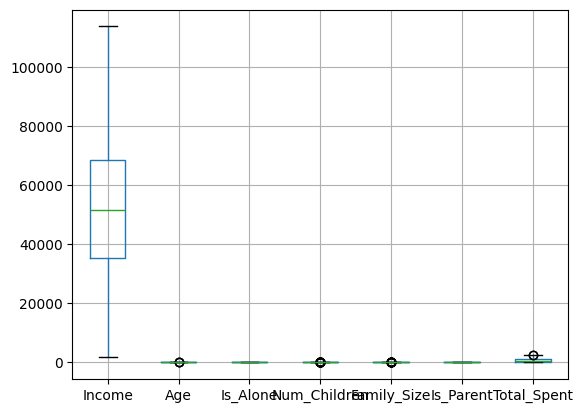

In [ ]:
df1.boxplot()

In [ ]:
numeric_features = ['Income', 'Age', 'Is_Alone', 'Num_Children', 'Family_Size', 'Is_Parent']
categorical_features = ['Education_Level']

In [ ]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
education_encoded = encoder.fit_transform(df1[['Education_Level']])
education_encoded_df = pd.DataFrame(education_encoded, columns=encoder.get_feature_names_out(['Education_Level']))

In [ ]:
education_encoded

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [0.],
       [0.]])

3(b)

In [ ]:
scaler = StandardScaler()
scaled_numeric = scaler.fit_transform(df1[numeric_features])
scaled_numeric_df = pd.DataFrame(scaled_numeric, columns=numeric_features)

In [ ]:
X_ = pd.concat([scaled_numeric_df.reset_index(drop=True), education_encoded_df.reset_index(drop=True)], axis=1)
y_ = df1['Total_Spent'].reset_index(drop=True)

In [ ]:
X_.head()

,Income,Age,Is_Alone,Num_Children,Family_Size,Is_Parent,Education_Level_Undergraduate
0,0.310639,0.980942,1.337794,-1.274528,-1.760066,-1.597316,1.0
1,-0.258325,1.231164,1.337794,1.408477,0.451610,0.626050,1.0
2,0.960698,0.313683,-0.747499,-1.274528,-0.654228,-1.597316,1.0
3,-1.208592,-1.271056,-0.747499,0.066975,0.451610,0.626050,1.0
4,0.318117,-1.020834,-0.747499,0.066975,0.451610,0.626050,0.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, random_state=42)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 95880.40243195301
R2 Score: 0.7430798326341163


Question 4: Why Use Encoding and Scaling?
Encoding is necessary to convert categorical variables (like Education_Level) into numerical format for the machine learning model to understand.

Scaling is required so that numerical features (like Income, Age) are on the same scale. This prevents high-value features from dominating the model training.

Question 5: Challenges Faced Before Running the Model
Some challenges you may mention:

Handling missing values, especially in Income.

Choosing the right features that actually impact spending.

Ensuring categorical values are encoded correctly.

Scaling features properly to avoid bias in regression.

Avoiding data leakage when splitting data into training and testing.